<a href="https://colab.research.google.com/github/Akshidha-Unni/BRAILLE-CHARACTER-RECOGNITION/blob/main/Braille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BRAILLE CHARACTER RECOGNITION**

This deep learning model is built using a simple neural network to recognise the braille symbols used by the blind.

The dataset used for this model is from the kaggle website:[link text](https://www.kaggle.com/datasets/shanks0465/braille-character-dataset)

### **Extracting Dataset From Kaggle**

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#configure path for json file from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Importing the Braille Character Dataset From Kaggle**

In [ ]:
#Kaggle api for the dataset
!kaggle datasets download -d shanks0465/braille-character-dataset

  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 212MB/s]


In [ ]:
#List the files and directories
!ls

braille-character-dataset.zip  kaggle.json  sample_data


In [ ]:
#Extracting the images from the Compressed zip file
from zipfile import ZipFile
data = '/content/braille-character-dataset.zip'
with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# counting the number of images in the dataset
import os

path, dirs, files = next(os.walk('/content/Braille Dataset/Braille Dataset'))
file_count = len(files)
print('Number of images in the dataset: ', file_count)

Number of images in the dataset:  1560


In [ ]:
#Printing the file names of the images present in the dataset
file_names = os.listdir('/content/Braille Dataset/Braille Dataset')

### **Importing the required libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix


### **Displaying an image from the dataset**

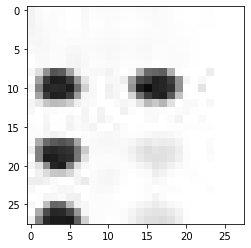

In [ ]:
img = mpimg.imread('/content/Braille Dataset/Braille Dataset/p1.JPG14whs.jpg')
imgplt = plt.imshow(img)
plt.show()

### **Assigning Labels to the images**

In [ ]:
filenames = os.listdir('/content/Braille Dataset/Braille Dataset/')

labels = []
label_val=[]
for i in range(1560):

  file_name = filenames[i]
  label = file_name[0]
  #if label == 'a':
  labels.append(label)
     #label_val.append(1)
np.unique(labels)
new_labels=pd.get_dummies(labels)

In [ ]:
new_labels.head(10)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### **Converting the images into numpy array**

In [ ]:
import glob
image_directory = '/content/Braille Dataset/Braille Dataset/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

braille = np.asarray([cv2.imread(file) for file in files])

In [ ]:
braille.shape

(1560, 28, 28, 3)

### **Splitting the Test and Train dataset**

In [ ]:
#Separating the dependent and independent variables
X = braille
Y = np.asarray(new_labels)

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,random_state=56,test_size=0.2,stratify=Y)

In [ ]:
X_train.shape,X_test.shape,Y_test.shape,Y_train.shape
#Y_test[10]

((1248, 28, 28, 3), (312, 28, 28, 3), (312, 26), (1248, 26))

### **Scaling the dataset**

In [ ]:
X_train = X_train/255
X_test = X_test/255

### **Building the Neural Network**

In [ ]:
#setting up the layers of NN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28,3)),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dense(26,activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fitting the train dataset on to the built model
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
39/39 [==============================] - 1s 7ms/step - loss: 3.4834 - accuracy: 0.0377
Epoch 2/100
39/39 [==============================] - 0s 7ms/step - loss: 3.2570 - accuracy: 0.0585
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 3.1929 - accuracy: 0.0753
Epoch 4/100
39/39 [==============================] - 0s 7ms/step - loss: 3.0870 - accuracy: 0.1386
Epoch 5/100
39/39 [==============================] - 0s 6ms/step - loss: 2.9319 - accuracy: 0.2043
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 2.6943 - accuracy: 0.2620
Epoch 7/100
39/39 [==============================] - 0s 7ms/step - loss: 2.3939 - accuracy: 0.3790
Epoch 8/100
39/39 [==============================] - 0s 6ms/step - loss: 2.1141 - accuracy: 0.4631
Epoch 9/100
39/39 [==============================] - 0s 6ms/step - loss: 1.9456 - accuracy: 0.4968
Epoch 10/100
39/39 [==============================] - 0s 7ms/step - loss: 1.7348 - accuracy: 0.5625
Epoch 11/

In [ ]:
#Accuracy in test data
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

10/10 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.8397
Test Loss = 0.6438955664634705
Test Accuracy = 0.8397436141967773


### **Predictive System**

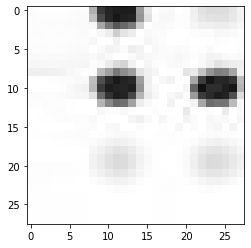

In [ ]:
#reading an image to predict
img = mpimg.imread('/content/Braille Dataset/Braille Dataset/h1.JPG6whs.jpg')
#displaying the image
imgplt = plt.imshow(img)
plt.show()
#converting the image into a numpy array
x=np.asarray(img)
#scaling the image
x=x/255
#reshaping the image
x = np.reshape(x, [1,28,28,3])

In [ ]:
#predicting the output for the image
pred=model.predict(x)
pred_label = np.argmax(pred)
pred_label
#the image is a 'H' so 7 should be the answer

7

In [ ]:
#summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2352)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               602368    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 26)                6682      
                                                                 
Total params: 674,842
Trainable params: 674,842
Non-trainable params: 0
_________________________________________________________________
